<a href="https://colab.research.google.com/github/cadyngo/EAS-Math-for-AI/blob/main/06_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimization for Machine Learning: A Hands-On Introduction

In almost every modern machine learning algorithm we **choose parameters**
to make some **loss / objective** small.

In this notebook we will:

- Connect **optimization** to familiar ML tasks (linear & logistic regression).
- Implement and experiment with:
  - Full-batch **gradient descent (GD)**
  - **Gradient descent with momentum**
  - **Stochastic gradient descent (SGD)** and **mini-batches**
- Get a first taste of **constrained optimization** and **Lagrange multipliers**.

> Running theme:  
> We always have some parameters $\theta$ and an objective $L(\theta)$,  
> and optimization is the process of *searching* for good $\theta$.


## 1. Setup

We’ll use:

- **NumPy** for linear algebra and numerical work
- **Matplotlib** for simple plots

Run the next cell to import everything.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=4, suppress=True)

print("NumPy:", np.__version__)


NumPy: 2.0.2


## 2. Warmup: A One-Dimensional Loss and Its Gradient

To warm up, consider a simple 1D "loss" function

$$
\ell(x) = x^4 + 7x^3 + 5x^2 - 17x + 3.
$$

Think of $x$ as a **single model parameter** (e.g., the weight of a tiny model).  
We want to **minimize** $\ell(x)$.

The gradient (derivative) is

$$
\frac{d\ell}{dx} = 4x^3 + 21x^2 + 10x - 17.
$$

Gradient descent in 1D is just:

$$
x_{t+1} = x_t - \gamma \,\frac{d\ell}{dx}(x_t),
$$

where $\gamma > 0$ is the **learning rate / step size**.


In [ ]:
def ell(x):
    # Scalar loss function ℓ(x).
    return x**4 + 7*x**3 + 5*x**2 - 17*x + 3

def dell(x):
    # Analytic derivative dℓ/dx.
    return 4*x**3 + 21*x**2 + 10*x - 17

# Quick sanity check: evaluate at one point
x0 = -4.0
print("ℓ(x0) =", ell(x0))
print("dℓ/dx(x0) =", dell(x0))


ℓ(x0) = -41.0
dℓ/dx(x0) = 23.0


In [ ]:
def gradient_descent_1d(x0, lr=0.01, steps=40):
    # Run vanilla 1D gradient descent and record all iterates.
    xs = [x0]
    for t in range(steps):
        g = dell(xs[-1])   # gradient at current point
        x_next = xs[-1] - lr * g
        xs.append(x_next)
    return np.array(xs)

# Try it
traj = gradient_descent_1d(x0=-5.0, lr=0.02, steps=40)
traj[:10]


array([-5.    , -4.16  , -4.497 , -4.4758, -4.4814, -4.48  , -4.4803,
       -4.4803, -4.4803, -4.4803])

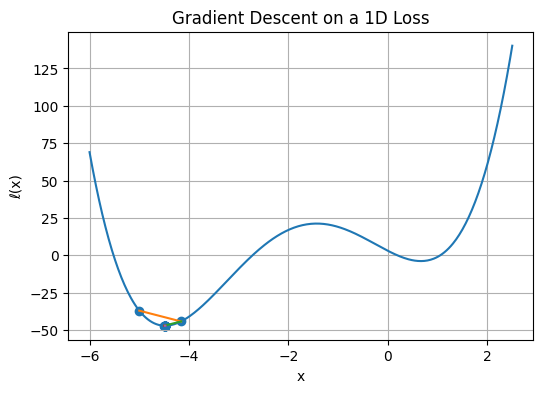

In [ ]:
# Plot ℓ(x) and GD path
xs = np.linspace(-6, 2.5, 400)
ys = ell(xs)

traj = gradient_descent_1d(x0=-5.0, lr=0.02, steps=20)

plt.figure(figsize=(6, 4))
plt.plot(xs, ys, label="ℓ(x)")
plt.scatter(traj, ell(traj), marker="o")
for i in range(len(traj)-1):
    plt.plot([traj[i], traj[i+1]], [ell(traj[i]), ell(traj[i+1])])

plt.xlabel("x")
plt.ylabel("ℓ(x)")
plt.title("Gradient Descent on a 1D Loss")
plt.grid(True)
plt.show()


### Your Turn: Step-Size Experiments

Play with the function `gradient_descent_1d`:

- Try **smaller** learning rates (e.g., `lr=0.001`).
- Try **larger** learning rates (e.g., `lr=0.1` or `lr=0.5`).
- Change the **starting point** `x0`.

Questions to think about:

- What happens when the learning rate is too **large**?
- How does changing `x0` affect which minimum you end up in (local vs global)?


### TODO (Coding): 1D Gradient Checks & Step-Size Sweep

So far we've *used* the analytic derivative and a fixed learning rate.
In this exercise you will:

1. Implement a **numerical derivative** `numeric_dell(x, h)` using finite differences.
2. Compare `numeric_dell(x)` to the analytic derivative `dell(x)` for several values of `x`.
3. Write a small loop that runs `gradient_descent_1d` for several learning rates and starting points, and prints a summary table of the final `x` and $\ell(x)$.

Use the code cell below as a starting point and fill in the `TODO` sections.


In [ ]:
# TODO: 1D gradient check + step-size experiments
#
# 1) Implement numeric_dell(x, h=1e-5) to approximate dℓ/dx with finite differences.
# 2) Compare numeric_dell(x) to dell(x) on a few test points.
# 3) Run gradient_descent_1d for a grid of learning rates and starting points and
#    print a small summary of the results.

def numeric_dell(x, h=1e-5):
    """Approximate dℓ/dx at scalar x using a finite-difference formula."""
    # TODO: use ell(x + h) and ell(x - h)
    # SOLUTION
    return (ell(x + h) - ell(x - h)) / (2 * h)

# TODO: choose some test points and compare analytic vs numeric derivative
# SOLUTION
xs_test = [-4.0, -2.0, 0.0, 1.0]
print("analytic vs numeric derivative comparison:")
for x in xs_test:
    analytic = dell(x)
    numeric = numeric_dell(x)
    print(f"x = {x: .2f} | analytic = {analytic: .4f} | numeric = {numeric: .4f}")

print()

# TODO: choose some learning rates and starting points to sweep over
# SOLUTION
learning_rates = [0.001, 0.01, 0.02, 0.06]
x0_values = [-5.0, -2.0, 0.0, 2.0]

print("GD on different x0 and learning rates:")
for lr in learning_rates:
    for x0 in x0_values:
        traj = gradient_descent_1d(x0=x0, lr=lr, steps=40)
        x_final = traj[-1]
        print(f"lr={lr: .3g}, x0={x0: .2f} -> x_T={x_final: .3f}, ell(x_T)={ell(x_final): .3f}")

analytic vs numeric derivative comparison:
x = -4.00 | analytic =  23.0000 | numeric =  23.0000
x = -2.00 | analytic =  15.0000 | numeric =  15.0000
x =  0.00 | analytic = -17.0000 | numeric = -17.0000
x =  1.00 | analytic =  18.0000 | numeric =  18.0000

GD on different x0 and learning rates:
lr= 0.001, x0=-5.00 -> x_T=-4.511, ell(x_T)=-47.045
lr= 0.001, x0=-2.00 -> x_T=-2.966, ell(x_T)=-7.851
lr= 0.001, x0= 0.00 -> x_T= 0.486, ell(x_T)=-3.220
lr= 0.001, x0= 2.00 -> x_T= 0.786, ell(x_T)=-3.494
lr= 0.01, x0=-5.00 -> x_T=-4.480, ell(x_T)=-47.075
lr= 0.01, x0=-2.00 -> x_T=-4.480, ell(x_T)=-47.075
lr= 0.01, x0= 0.00 -> x_T= 0.662, ell(x_T)=-3.840
lr= 0.01, x0= 2.00 -> x_T= 0.662, ell(x_T)=-3.840
lr= 0.02, x0=-5.00 -> x_T=-4.480, ell(x_T)=-47.075
lr= 0.02, x0=-2.00 -> x_T=-4.480, ell(x_T)=-47.075
lr= 0.02, x0= 0.00 -> x_T= 0.662, ell(x_T)=-3.840
lr= 0.02, x0= 2.00 -> x_T= 0.662, ell(x_T)=-3.840
lr= 0.06, x0=-5.00 -> x_T= 0.869, ell(x_T)=-2.837
lr= 0.06, x0=-2.00 -> x_T=-0.173, ell(x_T)= 6.

## 3. Full-Batch Gradient Descent for Linear Regression

Now let's move to a real ML setting: **linear regression**.

We have:

- Input features $X \in \mathbb{R}^{N \times d}$ (each row = sample)
- Targets $y \in \mathbb{R}^{N}$ (one scalar per sample)
- Parameters $\theta \in \mathbb{R}^{d}$

We use the **mean squared error (MSE)** loss

$$
L(\theta) = \frac{1}{N} \sum_{i=1}^N (x_i^\top\theta - y_i)^2.
$$

Our goal: find $\theta$ that minimizes $L(\theta)$.

This is a **convex** problem (nice landscape, only one global minimum).


In [ ]:
rng = np.random.default_rng(0)

N = 200          # number of samples
d = 2            # we'll learn slope and intercept
X_raw = rng.normal(size=(N, 1))  # single feature x
true_w = 3.0
true_b = -1.0
noise = rng.normal(scale=0.5, size=N)

y = true_w * X_raw[:, 0] + true_b + noise

# Add bias column of ones so θ = [w, b]
X = np.column_stack([X_raw[:, 0], np.ones(N)])

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (200, 2)
y shape: (200,)


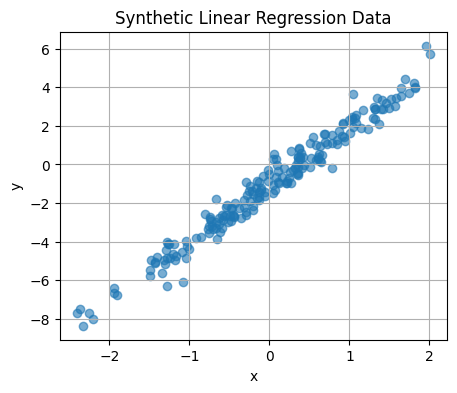

In [ ]:
plt.figure(figsize=(5, 4))
plt.scatter(X_raw[:, 0], y, alpha=0.6)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Synthetic Linear Regression Data")
plt.grid(True)
plt.show()


### 3.1 Loss and Gradient for Linear Regression

For

- $X \in \mathbb{R}^{N \times d}$,
- $y \in \mathbb{R}^N$,
- $\theta \in \mathbb{R}^d$,

we can write the loss compactly as

$$
L(\theta) = \frac{1}{N}\|X\theta - y\|_2^2.
$$

The gradient is

$$
\nabla_\theta L(\theta) = \frac{2}{N} X^\top(X\theta - y).
$$

We'll implement this and use **full-batch gradient descent**:
we use *all* $N$ samples in every gradient update.


In [ ]:
def lr_loss(theta, X, y):
    # Mean squared error for linear regression.
    # theta: shape (d,)
    # X: shape (N, d)
    # y: shape (N,)
    preds = X @ theta
    residuals = preds - y
    return np.mean(residuals**2)

def lr_grad(theta, X, y):
    # Gradient of MSE loss wrt theta.
    N = X.shape[0]
    preds = X @ theta
    residuals = preds - y
    return (2.0 / N) * (X.T @ residuals)


In [ ]:
# GD loop
def gradient_descent_lr(theta0, X, y, lr=0.1, steps=200):
    theta = theta0.copy()
    history = {"theta": [], "loss": []}
    for t in range(steps):
        L = lr_loss(theta, X, y)
        g = lr_grad(theta, X, y)
        history["theta"].append(theta.copy())
        history["loss"].append(L)

        theta = theta - lr * g
    return theta, history

theta0 = np.zeros(2)
theta_gd, hist = gradient_descent_lr(theta0, X, y, lr=0.1, steps=200)

print("True [w, b] =", [true_w, true_b])
print("Learned θ   =", theta_gd)
print("Final loss  =", hist['loss'][-1])


True [w, b] = [3.0, -1.0]
Learned θ   = [ 2.9654 -1.0437]
Final loss  = 0.26169545264174954


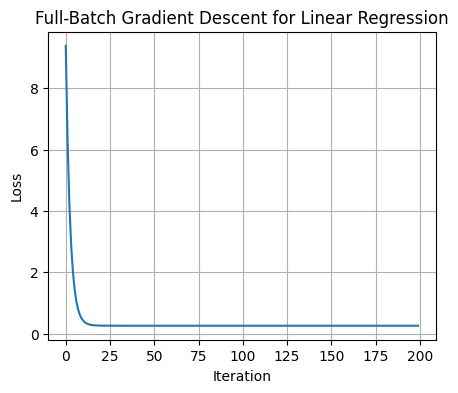

In [ ]:
plt.figure(figsize=(5, 4))
plt.plot(hist["loss"])
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Full-Batch Gradient Descent for Linear Regression")
plt.grid(True)
plt.show()


### Your Turn: Learning Rate & Initialization

Try:

- Different learning rates (`lr=0.01`, `lr=0.5`, etc.)
- Different initializations (`theta0 = rng.normal(size=2)`)

Because the loss is **convex**, gradient descent will converge to the *same*
global minimum (up to numerical issues), but the **speed** and **trajectory**
change with the learning rate.


### TODO (Coding): Implement Your Own Linear Regression GD

Use the expressions for the loss and gradient to write your **own** gradient descent routine for linear regression.

Concretely:

1. Implement a function `gd_linear_regression(theta0, X, y, lr, steps)` that
   - iteratively updates `theta` using the gradient,
   - stores the loss at each iteration,
   - returns both the final parameters and the history.
2. Run your implementation for a few different learning rates and/or initializations.
3. Plot the loss curves on the same figure and compare them to the provided `gradient_descent_lr` implementation.


Full Batch GD on different x0 and learning rates:
lr= 0.01, x0 = (-3.0, -1.0) -> loss= 0.281
lr= 0.01, x0 = (1.0, 1.0) -> loss= 0.266
lr= 0.01, x0 = (0.0, 0.0) -> loss= 0.267
lr= 0.01, x0 = (1.0, -2.0) -> loss= 0.264
lr= 0.1, x0 = (-3.0, -1.0) -> loss= 0.262
lr= 0.1, x0 = (1.0, 1.0) -> loss= 0.262
lr= 0.1, x0 = (0.0, 0.0) -> loss= 0.262
lr= 0.1, x0 = (1.0, -2.0) -> loss= 0.262
lr= 0.5, x0 = (-3.0, -1.0) -> loss= 0.262
lr= 0.5, x0 = (1.0, 1.0) -> loss= 0.262
lr= 0.5, x0 = (0.0, 0.0) -> loss= 0.262
lr= 0.5, x0 = (1.0, -2.0) -> loss= 0.262


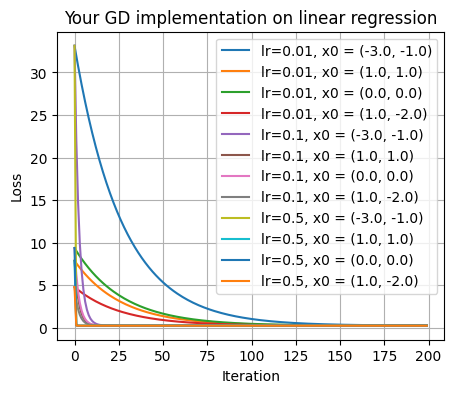

In [ ]:
# TODO: Your own implementation of GD for linear regression
# Suggested API:

def gd_linear_regression(theta0, X, y, lr=0.1, steps=200):
    """Run gradient descent for linear regression.
    Returns (theta_final, loss_history).
    Hint: reuse lr_loss and lr_grad defined above.
    """
    # TODO: initialize theta, create an empty list for losses, and iterate

    # Solution
    theta = theta0.copy()
    L_theta = []
    for t in range(steps):
        L = lr_loss(theta, X, y)
        g = lr_grad(theta, X, y)
        L_theta.append(L)

        theta = theta - lr * g
    return theta, L_theta

# loop over different x0s and learning rates
# SOLUTION
# Different initializations and LRs
initial_x = np.array([[-3.0, -1.0], [1.0, 1.0], [0, 0], [1.0, -2.0]])
learning_rates = [0.01, 0.1, 0.5]

print("Full Batch GD on different x0 and learning rates:")
for lr in learning_rates:
  for x0 in initial_x:
    theta_hat, loss_hist = gd_linear_regression(x0, X, y, lr=lr, steps=200)
    print(f"lr={lr: .3g}, x0 = {float(x0[0]), float(x0[1])} -> loss={loss_hist[-1]: .3f}")

# plot the loss curvatures
# SOLUTION
plt.figure(figsize=(5, 4))
for lr in learning_rates:
  for x0 in initial_x:
    theta_hat, loss_hist = gd_linear_regression(x0, X, y, lr=lr, steps=200)
    plt.plot(loss_hist, label=f"lr={lr}, x0 = {float(x0[0]), float(x0[1])}")

plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Your GD implementation on linear regression")
plt.legend()
plt.grid(True)
plt.show()


## 4. Gradient Descent with Momentum

Plain gradient descent can be slow or "zig-zaggy" when the loss surface
is **ill-conditioned** (curved in some directions much more than others).

Motivation example (quadratic):

$$
f(x) = \frac{1}{2} x^\top A x - b^\top x,
$$

where $A$ is positive definite but poorly conditioned.

Gradient descent update:

$$
x_{t+1} = x_t - \gamma \nabla f(x_t)
        = x_t - \gamma (A x_t - b).
$$

**Momentum** adds a *velocity* term that remembers the previous step:

- $v_{t+1} = \alpha v_t - \gamma \nabla f(x_t)$  
- $x_{t+1} = x_t + v_{t+1}$

where $0 \le \alpha < 1$ is the **momentum coefficient**.


In [ ]:
# 2D ill-conditioned quadratic example
A = np.array([[2.0, 1.0],
              [1.0, 20.0]])
b = np.array([5.0, 3.0])

def f_quad(x):
    return 0.5 * x.T @ A @ x - b.T @ x

def grad_quad(x):
    return A @ x - b


In [ ]:
def run_gd(f, grad, x0, lr=0.1, steps=40):
    xs = [x0.copy()]
    for t in range(steps):
        g = grad(xs[-1])
        xs.append(xs[-1] - lr * g)
    return np.stack(xs)

def run_gd_momentum(f, grad, x0, lr=0.1, alpha=0.9, steps=40):
    xs = [x0.copy()]
    v = np.zeros_like(x0)
    for t in range(steps):
        g = grad(xs[-1])
        v = alpha * v - lr * g
        xs.append(xs[-1] + v)
    return np.stack(xs)

x0 = np.array([-3.0, -1.0])
traj_gd = run_gd(f_quad, grad_quad, x0, lr=0.1, steps=40)
traj_mom = run_gd_momentum(f_quad, grad_quad, x0, lr=0.1, alpha=0.1, steps=40)

print(traj_gd.shape, traj_mom.shape)

(41, 2) (41, 2)


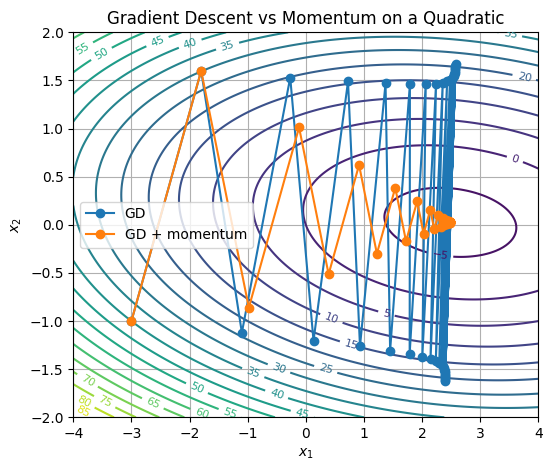

In [ ]:
# Create a contour plot of f and overlay trajectories
x1 = np.linspace(-4, 4, 200)
x2 = np.linspace(-2, 2, 200)
X1, X2 = np.meshgrid(x1, x2)
Z = 0.5 * (A[0,0]*X1**2 + 2*A[0,1]*X1*X2 + A[1,1]*X2**2) - b[0]*X1 - b[1]*X2

plt.figure(figsize=(6, 5))
cs = plt.contour(X1, X2, Z, levels=20)
plt.clabel(cs, inline=True, fontsize=8)

plt.plot(traj_gd[:, 0], traj_gd[:, 1], marker="o", label="GD")
plt.plot(traj_mom[:, 0], traj_mom[:, 1], marker="o", label="GD + momentum")

plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Gradient Descent vs Momentum on a Quadratic")
plt.legend()
plt.grid(True)
plt.show()


### Observations

- Plain GD takes a "zig-zag" path, especially along the narrow direction.
- Momentum **smooths** the path and can converge faster.

Try:

- Changing `alpha` (e.g., `0.0`, `0.5`, `0.99`).
- Changing the learning rate `lr`.

In deep learning libraries (PyTorch, TensorFlow, etc.), variants like
**SGD with momentum**, **Adam**, etc. are all based on these same ideas.


## 5. Stochastic Gradient Descent (SGD) for Logistic Regression

For large datasets, computing the **full gradient** on all samples every step
can be very costly.

Instead, we can approximate the gradient using only a **mini-batch** of data.

We’ll demonstrate this with **binary logistic regression** in 2D:

- Input $x_i \in \mathbb{R}^2$
- Label $y_i \in \{0, 1\}$
- Parameters $\theta \in \mathbb{R}^2$, bias $b \in \mathbb{R}$

Model:

$$
p_\theta(y=1|x) = \sigma(\theta^\top x + b),
$$

where $\sigma(z) = \frac{1}{1 + e^{-z}}$ is the logistic sigmoid.

Loss (negative log-likelihood):

$$
L(\theta, b) = -\frac{1}{N} \sum_{i=1}^N \Big[ y_i \log p_i
  + (1-y_i)\log(1-p_i) \Big].
$$


In [ ]:
rng = np.random.default_rng(1)

N_per_class = 150
mean0 = np.array([-1.0, 0.0])
mean1 = np.array([1.0, 0.5])

cov = np.array([[0.4, 0.2],
                [0.2, 0.4]])

X0 = rng.multivariate_normal(mean0, cov, size=N_per_class)
X1 = rng.multivariate_normal(mean1, cov, size=N_per_class)

X_log = np.vstack([X0, X1])
y_log = np.concatenate([np.zeros(N_per_class), np.ones(N_per_class)])

print("X_log shape:", X_log.shape)
print("y_log shape:", y_log.shape)


X_log shape: (300, 2)
y_log shape: (300,)


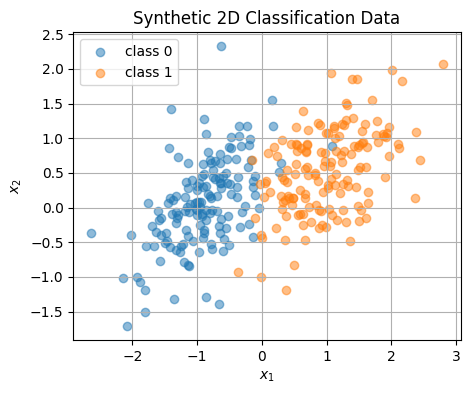

In [ ]:
plt.figure(figsize=(5, 4))
plt.scatter(X0[:, 0], X0[:, 1], alpha=0.5, label="class 0")
plt.scatter(X1[:, 0], X1[:, 1], alpha=0.5, label="class 1")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()
plt.title("Synthetic 2D Classification Data")
plt.grid(True)
plt.show()


In [ ]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def logreg_loss(theta, b, X, y):
    # Binary logistic regression loss (average negative log-likelihood).
    # theta: (d,)
    # b: scalar
    # X: (N, d)
    # y: (N,)
    logits = X @ theta + b
    p = sigmoid(logits)
    eps = 1e-8  # numerical stability
    loss = -np.mean(y * np.log(p + eps) + (1 - y) * np.log(1 - p + eps))
    return loss

def logreg_grad(theta, b, X, y):
    # Gradient of logistic loss wrt theta and b.
    logits = X @ theta + b
    p = sigmoid(logits)
    diff = p - y  # shape (N,)
    dtheta = X.T @ diff / X.shape[0]
    db = np.mean(diff)
    return dtheta, db


In [ ]:
def sgd_logreg(theta0, b0, X, y, lr=0.1, batch_size=32, epochs=20):
    theta = theta0.copy()
    b = b0
    N = X.shape[0]
    history_full = []
    history_batch = []

    for epoch in range(epochs):
        # Full-batch loss (for tracking)
        full_loss = logreg_loss(theta, b, X, y)
        history_full.append(full_loss)

        # Shuffle data
        idx = np.arange(N)
        np.random.shuffle(idx)
        X_shuf = X[idx]
        y_shuf = y[idx]

        # Go over mini-batches
        for start in range(0, N, batch_size):
            end = start + batch_size
            X_batch = X_shuf[start:end]
            y_batch = y_shuf[start:end]

            dtheta, db = logreg_grad(theta, b, X_batch, y_batch)
            theta -= lr * dtheta
            b -= lr * db

            # Track batch loss occasionally (optional)
            history_batch.append(logreg_loss(theta, b, X_batch, y_batch))

    return theta, b, history_full, history_batch

theta0 = np.zeros(X_log.shape[1])
b0 = 0.0
theta_sgd, b_sgd, hist_full, hist_batch = sgd_logreg(
    theta0, b0, X_log, y_log, lr=0.2, batch_size=32, epochs=30
)

print("Final full-batch loss:", hist_full[-1])
print("theta:", theta_sgd)
print("b:", b_sgd)


Final full-batch loss: 0.12504197110684834
theta: [ 3.9171 -0.3219]
b: 0.00578669887400551


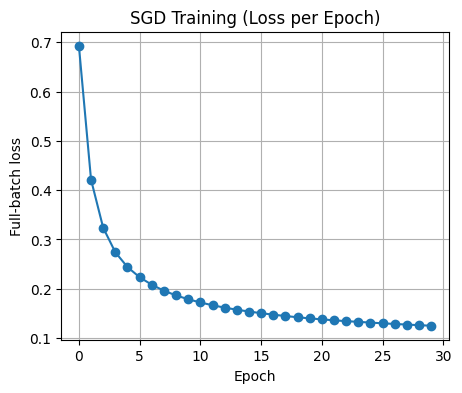

In [ ]:
plt.figure(figsize=(5, 4))
plt.plot(hist_full, marker="o")
plt.xlabel("Epoch")
plt.ylabel("Full-batch loss")
plt.title("SGD Training (Loss per Epoch)")
plt.grid(True)
plt.show()

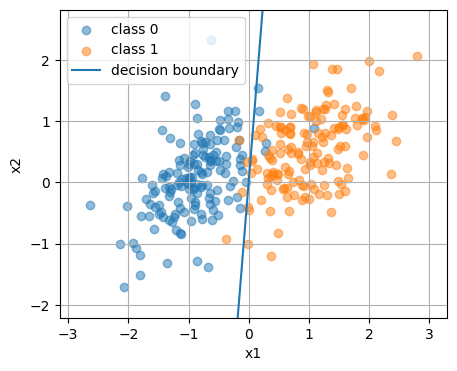

In [ ]:
# Plot data and learned decision boundary
plt.figure(figsize=(5, 4))
plt.scatter(X0[:, 0], X0[:, 1], alpha=0.5, label="class 0")
plt.scatter(X1[:, 0], X1[:, 1], alpha=0.5, label="class 1")

# Decision boundary: θ^T x + b = 0  =>  x2 = -(θ1 x1 + b)/θ2
x1_line = np.linspace(X_log[:, 0].min()-1, X_log[:, 0].max()+1, 20)
if abs(theta_sgd[1]) > 1e-6:
    x2_line = -(theta_sgd[0]*x1_line + b_sgd)/theta_sgd[1]
    plt.plot(x1_line, x2_line, label="decision boundary")

# ---- Crop the view to where the data actually are ----
x_min = X_log[:, 0].min() - 0.5
x_max = X_log[:, 0].max() + 0.5
y_min = X_log[:, 1].min() - 0.5
y_max = X_log[:, 1].max() + 0.5

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.legend()
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.show()

### Your Turn: SGD Hyperparameters

Experiment with:

- `batch_size` (e.g., 1 for pure SGD, 32, 128, full batch).
- Learning rate `lr`.
- Number of `epochs`.

Watch how:

- The **noise** in the updates changes.
- The **speed** of convergence changes.
- The final classifier moves.


### TODO (Coding): Compare SGD to Full-Batch GD for Logistic Regression

Right now we only have an SGD implementation. In this exercise you will:

1. Implement a **full-batch** gradient descent routine for logistic regression.
2. Track and plot the loss over epochs for both:
   - full-batch GD,
   - SGD (mini-batch).
3. Experiment with batch size and learning rate and see how the curves differ.

Use the logistic loss and gradient formulas from lecture (or derive them) and the code above as a guide.


Final full-batch loss: 0.2787170788325157
theta: [1.4748 0.1988]
b: -0.05827392514603019


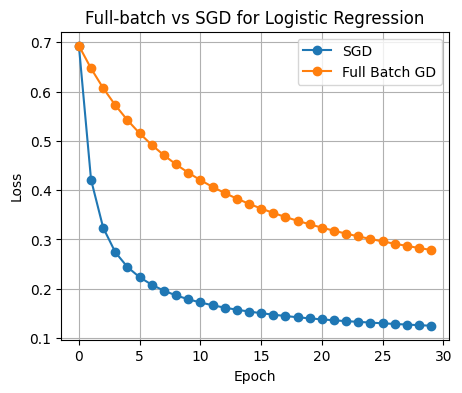

In [ ]:
# TODO: Full-batch vs SGD for logistic regression

def gd_logreg(theta0, b0, X, y, lr=0.1, epochs=30):
    # TODO: implement full-batch GD using logreg_grad

    # SOLUTION
    theta = theta0.copy()
    b = b0
    N = X.shape[0]
    history_full = []

    for epoch in range(epochs):
        # Full-batch loss (for tracking)
        full_loss = logreg_loss(theta, b, X, y)
        history_full.append(full_loss)
        dtheta, db = logreg_grad(theta, b, X, y)
        theta -= lr * dtheta
        b -= lr * db

    return theta, b, history_full

# After you implement these, run gd_logreg and sgd_logreg on the same data
# and plot their loss curves on the same figure to compare their behavior.

th, b, history_full = gd_logreg(theta0, b0, X_log, y_log, lr=0.2, epochs=30)
print("Final full-batch loss:", history_full[-1])
print("theta:", th)
print("b:", b)

# plot
plt.figure(figsize=(5, 4))
plt.plot(hist_full, marker="o", label="SGD")
plt.plot(history_full, marker="o", label="Full Batch GD")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Full-batch vs SGD for Logistic Regression")
plt.legend()
plt.grid(True)
plt.show()

## 6. Constrained Optimization & Lagrange Multipliers (Toy Example)

Sometimes we want to **optimize under constraints**, e.g.

> minimize $f(x)$ subject to $g(x) \le 0$.

Example:

$$
\min_{x, y} \quad f(x, y) = x^2 + y^2 \\
\text{subject to } x + y = 1.
$$

Geometric picture:

- $x^2 + y^2$ is the **squared distance** to the origin.
- The constraint $x + y = 1$ is a straight line.
- We are looking for the point on the line closest to the origin.

We can use the **Lagrangian**

$$
\mathcal{L}(x, y, \lambda)
= x^2 + y^2 + \lambda(x + y - 1),
$$

and set partial derivatives to zero:

- $\partial \mathcal{L}/\partial x = 2x + \lambda = 0$
- $\partial \mathcal{L}/\partial y = 2y + \lambda = 0$
- $\partial \mathcal{L}/\partial \lambda = x + y - 1 = 0$


In [ ]:
# Analytic solution from Lagrange conditions:
# 2x + λ = 0 and 2y + λ = 0 => x = y
# plus x + y = 1 => x = y = 0.5

x_star = 0.5
y_star = 0.5
print("Analytic solution (x*, y*):", (x_star, y_star))
print("Objective value:", x_star**2 + y_star**2)

# Numerical grid search to confirm
xs = np.linspace(-1, 2, 200)
ys = np.linspace(-1, 2, 200)
best_val = float("inf")
best_xy = None
for x in xs:
    for y in ys:
        if abs(x + y - 1) < 1e-3:  # approximately on the line
            val = x**2 + y**2
            if val < best_val:
                best_val = val
                best_xy = (x, y)
print("Best grid point:", best_xy, "value:", best_val)


In [ ]:
# Plot the constraint line x + y = 1 and highlight the optimum
xs = np.linspace(-0.5, 1.5, 200)
ys = 1 - xs

plt.figure(figsize=(5, 4))
plt.plot(xs, ys, label="x + y = 1")
plt.scatter([x_star], [y_star], label="optimum")
plt.xlabel("x")
plt.ylabel("y")
plt.axis("equal")
plt.title("Constrained Optimization: min x² + y² s.t. x + y = 1")
plt.grid(True)
plt.legend()
plt.show()


### From Constraints to Regularization (ML Connection)

Often in ML we want parameters that are **small** (to avoid overfitting).

Constrained view:

- Minimize training loss $L(\theta)$
- Subject to $\|\theta\|_2^2 \le C$

Using Lagrange multipliers, this is equivalent to **regularized** loss:

$$
L_{\text{reg}}(\theta)
= L(\theta) + \lambda \|\theta\|_2^2.
$$

This is exactly **L2 regularization** / **weight decay**, which we use all the time
in regression and deep nets.


## 7. Convexity and Why We Love It

A set $C$ is **convex** if for any $x, y \in C$ and any $\alpha \in [0, 1]$,

$$
\alpha x + (1-\alpha) y \in C.
$$

A function $f$ is **convex** if for all $x, y$ and $\alpha \in [0, 1]$,

$$
f((1-\alpha)x + \alpha y)
\le (1-\alpha) f(x) + \alpha f(y).
$$

Intuition: the line segment between any two points on the graph of $f$
lies **above** the graph.

Why ML people care:

- Many losses we use (MSE, logistic loss with L2 regularization) are convex.
- For convex problems, *every local minimum is global*:
  gradient-based methods are *guaranteed* to find the best solution (under mild conditions).


In [ ]:
def f_convex(x):
    # f(x) = x log x, defined for x > 0.
    return x * np.log2(x)

rng = np.random.default_rng(123)
num_violations = 0
num_trials = 1000

for _ in range(num_trials):
    x = rng.uniform(0.1, 4.0)
    y = rng.uniform(0.1, 4.0)
    alpha = rng.uniform(0.0, 1.0)
    lhs = f_convex((1-alpha)*x + alpha*y)
    rhs = (1-alpha)*f_convex(x) + alpha*f_convex(y)
    if lhs > rhs + 1e-8:
        num_violations += 1

print("Violations of convexity inequality:", num_violations, "out of", num_trials)


### Optional Reading / Extensions

From here, common next steps include:

- **Convex programming**: minimize a convex function over a convex set.
- **Linear programming (LP)**: linear objective + linear constraints.
- **Quadratic programming (QP)**: quadratic objective + linear constraints.
- **Duality**: the relationship between "primal" and "dual" optimization problems.

You can connect these ideas to ML models like:

- Support Vector Machines (QP)
- L1-regularized regression (LP / convex)
- Many regularized regression and classification problems (convex programming).

But even in deep learning with non-convex objectives, the **basic tools**
you practiced here—gradient descent, momentum, SGD—are the core workhorses.
